# HW 8: Clustering by K-Means
---

In [0]:
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 14
%matplotlib inline

# Import a Beer data set to a dataframe

In [0]:
#1 Code to read csv file into colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
#2. Get the file
#make sure you upload all your data files to your Google drive and change share->Advanced->change->anyone with the link can view
downloaded = drive.CreateFile({'id':'1bjCoHPxe_96Ijoz8eCzYUikwlkPA6XDc'}) # replace the id with id of file you want to access
downloaded.GetContentFile('beer.txt')

In [4]:
url = 'beer.txt'
beer = pd.read_csv(url, sep=' ')
beer

,name,calories,sodium,alcohol,cost
0,Budweiser,144,15,4.7,0.43
1,Schlitz,151,19,4.9,0.43
2,Lowenbrau,157,15,0.9,0.48
3,Kronenbourg,170,7,5.2,0.73
4,Heineken,152,11,5.0,0.77
5,Old_Milwaukee,145,23,4.6,0.28
6,Augsberger,175,24,5.5,0.40
7,Srohs_Bohemian_Style,149,27,4.7,0.42
8,Miller_Lite,99,10,4.3,0.43
9,Budweiser_Light,113,8,3.7,0.40


#### Let's pick the feature set

In [5]:
# Define X.
X = beer.drop('name', axis=1)
X

,calories,sodium,alcohol,cost
0,144,15,4.7,0.43
1,151,19,4.9,0.43
2,157,15,0.9,0.48
3,170,7,5.2,0.73
4,152,11,5.0,0.77
5,145,23,4.6,0.28
6,175,24,5.5,0.40
7,149,27,4.7,0.42
8,99,10,4.3,0.43
9,113,8,3.7,0.40


#### Do we need to define a target called Y? Explain.

**Answer:** No, as we are implementing Unsupervised machine learning and there is no true target exist in the data already, for unsupervised learning problems we  find clusters which exists in the data based on similarities, so we don't need Y(target variable). 

## K-Means Clustering

#### Create a K-means model with three clusters and fit it with 'X'.

In [6]:
#
model = KMeans(n_clusters=3, random_state=1).fit(X)
model

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=1, tol=0.0001, verbose=0)

#### Review and show the cluster labels.

In [7]:
#
predicted = model.labels_

print("Predicted clusters to points: ", predicted)


Predicted clusters to points:  [0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 2 0 0 2 1]


#### Add the cluster labels as an additional column('cluster') in the dataframe and print out the dataframe as sorted by cluster.

In [8]:
#
X['cluster'] = predicted
X.sort_values(by='cluster')

,calories,sodium,alcohol,cost,cluster
0,144,15,4.7,0.43,0
1,151,19,4.9,0.43,0
2,157,15,0.9,0.48,0
3,170,7,5.2,0.73,0
4,152,11,5.0,0.77,0
5,145,23,4.6,0.28,0
6,175,24,5.5,0.40,0
7,149,27,4.7,0.42,0
17,144,24,4.9,0.43,0
16,139,19,4.4,0.43,0


#### What feature(s) do the clusters seem to be based on? Why?

**Answer:**  The cluster seems to be based on **calories(primary focus)** and somewhat on alcohol as well with one point as outlier. <br/>
As the values are not standardized and calories have high values when compared to  other feature values.

#### Show the cluster centers.

In [9]:
#
centroids = model.cluster_centers_

print("Location of centroids: ")
print(centroids)

Location of centroids: 
[[150.          17.           4.52142857   0.52071429]
 [102.75        10.           4.075        0.44      ]
 [ 70.          10.5          2.6          0.42      ]]


#### Calculate the mean of each feature for each cluster.

In [10]:
# hint: 
# beer.groupby('cluster').mean()
X.groupby('cluster').mean()

,calories,sodium,alcohol,cost
cluster,,,,
0,150.00,17.0,4.521429,0.520714
1,102.75,10.0,4.075000,0.440000
2,70.00,10.5,2.600000,0.420000


#### Save the `mean` of cluster centers as 'centers'.

In [11]:
#
centers = X.groupby('cluster').mean()
centers

,calories,sodium,alcohol,cost
cluster,,,,
0,150.00,17.0,4.521429,0.520714
1,102.75,10.0,4.075000,0.440000
2,70.00,10.5,2.600000,0.420000


In [12]:
type(centers)

pandas.core.frame.DataFrame

#### Create a "colors" array for plotting.

In [0]:

# colors = np.array(['red', 'green', 'blue', 'yellow'])


#### Scatter plot of calories versus alcohol, colored by cluster (0=red, 1=green, 2=blue).

<Figure size 648x648 with 0 Axes>

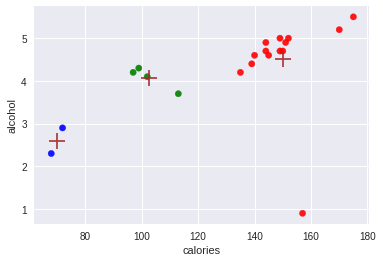

In [13]:
colors = {0:'red', 1:'green', 2:'blue'}
plt.figure(figsize=(9,9))

X.plot(x = 'calories', y='alcohol', kind="scatter",c=X['cluster'].apply(lambda x: colors[x]), alpha=.9, s=40)
plt.scatter(centers['calories'], centers['alcohol'], marker='+', s=250, alpha=.9, c='brown')

#### Create a scatter plot matrix (clusters should be colored as: 0=red, 1=green, 2=blue).

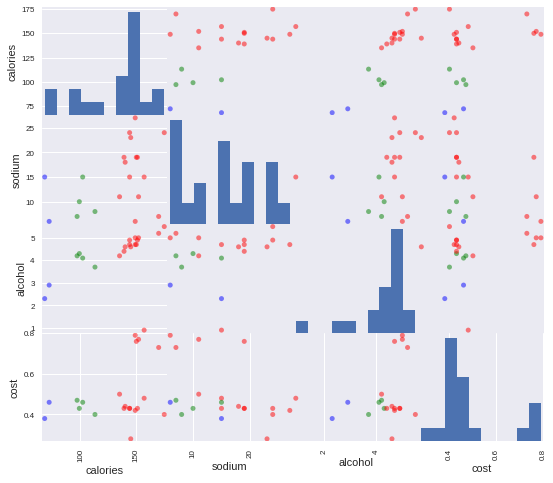

In [14]:
#
spm = pd.plotting.scatter_matrix(X.drop('cluster',axis=1), alpha=0.5, figsize=(9, 8), diagonal='hist', c=X['cluster'].apply(lambda x: colors[x]),s=100)

<a id="repeat-with-scaled-data"></a>
### Repeat With Scaled Data

Unscaled features cause most algorithms to put too much weight onto one feature. We can scale our data to make sure k-means accounts for all features.

#### Use StandardScaler to scale the data X.

In [15]:
#

data = X.drop('cluster', axis=1).copy()
scaler = StandardScaler(copy=True, with_mean=True, with_std=True)

scaled_data = pd.DataFrame(scaler.fit_transform(data),columns = data.columns)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


#### Show the scaled X indeed has mean and standard deviation close to 0 and 1, respectively.

In [16]:
#
print(scaled_data.mean(axis = 0))
print(scaled_data.std(axis=0))

calories   -3.219647e-16
sodium      7.771561e-17
alcohol    -1.003711e-15
cost       -3.608225e-16
dtype: float64
calories    1.025978
sodium      1.025978
alcohol     1.025978
cost        1.025978
dtype: float64


#### Repeat K-means with three clusters on scaled data.

In [0]:
#
scaledData_model = KMeans(n_clusters=3, random_state=1).fit(scaled_data)

#### Add the cluster labels as an additional column('cluster') in the dataframe and print out the dataframe as sorted by cluster.

In [18]:
#
scaled_data['cluster'] = scaledData_model.labels_
scaled_data.sort_values(by='cluster')

,calories,sodium,alcohol,cost,cluster
0,0.387913,0.007795,0.433808,-0.456830,0
1,0.625066,0.631369,0.622420,-0.456830,0
17,0.387913,1.410837,0.622420,-0.456830,0
16,0.218519,0.631369,0.150890,-0.456830,0
5,0.421792,1.254943,0.339502,-1.519224,0
6,1.438159,1.410837,1.188256,-0.669309,0
7,0.557308,1.878518,0.433808,-0.527656,0
10,0.252398,0.475475,0.339502,-0.386003,0
15,-2.186883,0.007795,-1.829537,-0.810961,1
12,0.083003,-0.615780,-0.037722,0.038954,1


In [0]:
# X_norm = X.drop('cluster', axis=1).copy()
# min_max = MinMaxScaler()
# X_scaled = pd.DataFrame(min_max.fit_transform(X_norm), columns=X_norm.columns)
# X_scaled


#### What are the "characteristics" of each cluster?

**Answer:** The Characteristics of clusters based on mean values with random state = 1:

1. For the cluster zero, mean of sodium is around 0.9 which is highest among other, this cluster is more focussed on sodium.
2. For the cluster one, mean of cost is around -0.33 which is highest among other, this cluster is more focussed on cost.
3. For the cluster two, mean of cost is around 1.89 which is highest among other, this cluster is more focussed on cost.
4. I can observe that cluster mean's for calories and alcohol are nicely separated but sodium and cost show extreme values, which looks unusual.
5. As the random state of model (data) changes , cluster characteristics are also influenced, the above characterisrics are based on random state 1.

#### Show the cluster centers.

In [19]:
#
centers_scaled = scaled_data.groupby('cluster').mean()
centers_scaled

,calories,sodium,alcohol,cost
cluster,,,,
0,0.536134,0.962643,0.516326,-0.616189
1,-0.920659,-0.635266,-0.862900,-0.332884
2,0.769051,-0.654753,0.693150,1.898145


#### Create scatter plot matrix of new cluster assignments (0=red, 1=green, 2=blue).

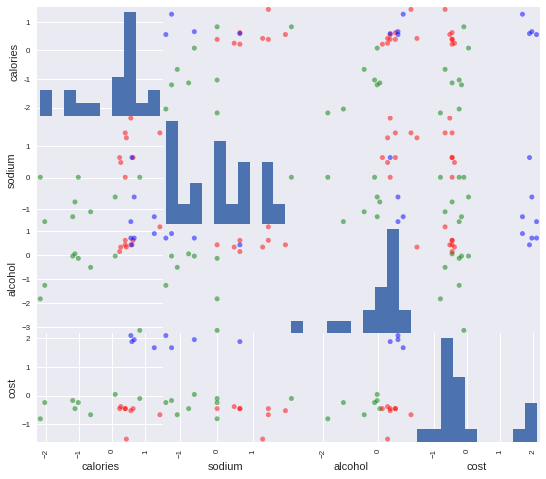

In [20]:
#
spm = pd.plotting.scatter_matrix(scaled_data.drop('cluster',axis=1), alpha=0.5, figsize=(9, 8), diagonal='hist', c=scaled_data['cluster'].apply(lambda x: colors[x]),s=100)

#### Do you notice any feaure(s) irrelevant in clustering assignments? How would you explain this?

**Answer:** It appears that sodium is not often useful in predicting the cluster. Perhaps sodium levels vary quite a lot amongst all types of beers and are not indicative of beer type (indeed, the sodium is quite low compared to most foods).

####  Do you notice any feaure(s) irrelevant in clustering assignments? How would you explain this?

**Answer:** It appears that `sodium` is not often useful in predicting the cluster. Perhaps sodium levels vary quite a lot amongst all types of beers and are not indicative of beer type (indeed, the sodium is quite low compared to most foods).

In [21]:
inertia = scaledData_model.inertia_
print ('inertia: ',inertia)
print ('Silhouette Score:', metrics.silhouette_score(scaled_data.drop("cluster", axis = 1), scaled_data.cluster, metric='euclidean'))

inertia:  27.849901261962508
Silhouette Score: 0.45777415910909475


### Applying the elbow method to k-means

The [elbow method](https://en.wikipedia.org/wiki/Elbow_method_(clustering) is one possible method to help narrow in on the ideal value of **K**. The method is built around the concept of diminishing returns where the percentage of explained variance is reviewed as a function of the number of clusters: One should choose a number of clusters where the next cluster doesn't significantly explain additional variance. 

[Determining the right number of clusters](https://en.wikipedia.org/wiki/Determining_the_number_of_clusters_in_a_data_set)   

Try a range of K and plot both the Inertia Over K and Silhouette Over K curves.

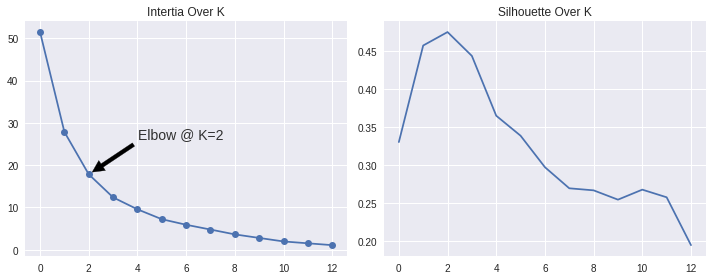

In [22]:
#
values = range(2,15)
scores = []
for value in values:        
    scaledData_model = KMeans(n_clusters = value)
    X_scaled = scaled_data[["calories", "sodium","alcohol", "cost"]]
    scaledData_model.fit(X_scaled)
    score    = metrics.silhouette_score(X_scaled, scaledData_model.labels_)
    inertia = scaledData_model.inertia_
    scores.append({
                    "inertia":    inertia,
                    "silhouette": score
                })

eval_scores = pd.DataFrame(scores)
eval_scores.head()

fig, ax = plt.subplots(ncols=2, figsize=(10, 4))
eval_scores["inertia"].plot(ax=ax[0], title="Intertia Over K", marker='o')
eval_scores["silhouette"].plot(ax=ax[1], title="Silhouette Over K")

# Add the arrow!
ax[0].annotate('Elbow @ K=2', xy = (0.2, .35),  xycoords = 'axes fraction', \
    xytext = (0.35, 0.5), fontsize = 14, \
    color = '#303030', arrowprops=dict(facecolor='black', shrink=0.05))

fig.tight_layout()

#### Let's analyze the above

- Do you see the **"elbow"**?

- What's the best value of k?



**Answer**
1. Yes I can see the elbow but there is no obvious point where the curve starts flattening out.
2. K=2 is the best value for elbow I could find.